In [108]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
DATA_DIR = r"C:\Users\Muhammad Nauman\Desktop\tensor_ops\data"
ratings_path = os.path.join(DATA_DIR, "u.data")
users_path   = os.path.join(DATA_DIR, "u.user")
items_path   = os.path.join(DATA_DIR, "u.item")

In [110]:
print("u.data File")
display(pd.read_csv(ratings_path, sep='\t', header=None).head())

print("\nu.user File")
display(pd.read_csv(users_path, sep='|', header=None).head())

print("\nu.item File")
display(pd.read_csv(items_path, sep='|', header=None, encoding='latin-1').head())

u.data File


,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596



u.user File


,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213



u.item File


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Renaming Cols

In [111]:
# data
ratings_col = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_path, sep='\t', names=ratings_col)

# user 
users_col = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(users_path, sep='|', names=users_col)

# item 
item_col = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL','unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv(items_path, sep='|', encoding='latin-1', names=item_col)

display(ratings.head())
display(users.head())
display(items.head(3))

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


,item_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## EDA

In [112]:
ratings.info()
users.info()
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ---

In [113]:
display(ratings.describe())

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [114]:
display(users.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,943.0,NaN,NaN,NaN,472.0,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,NaN,NaN,NaN,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0
gender,943,2,M,670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,943,21,student,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,943,795,55414,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
display(pd.DataFrame(items.columns, columns=['Column Names']))

,Column Names
0,item_id
1,title
2,release_date
3,video_release_date
4,IMDb_URL
5,unknown
6,Action
7,Adventure
8,Animation
9,Children


## Distribution Plots

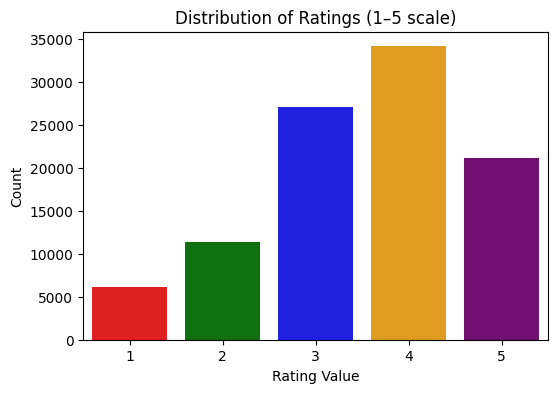

In [116]:
# Ratings Distribution Plot
plt.figure(figsize=(6,4))
palette=['red', 'green', 'blue', 'orange', 'purple']
sns.countplot(x='rating', data=ratings, hue='rating', palette=palette, legend=False)
plt.title("Distribution of Ratings (1–5 scale)")
plt.xlabel("Rating Value")
plt.ylabel("Count")
plt.show()


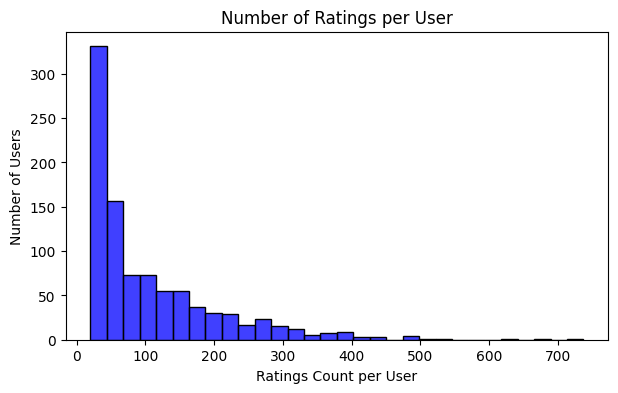

In [117]:
# User Activity, Ratings per User
user_activity = ratings['user_id'].value_counts()
plt.figure(figsize=(7,4))
sns.histplot(user_activity, bins=30, color='blue', kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count per User")
plt.ylabel("Number of Users")
plt.show()


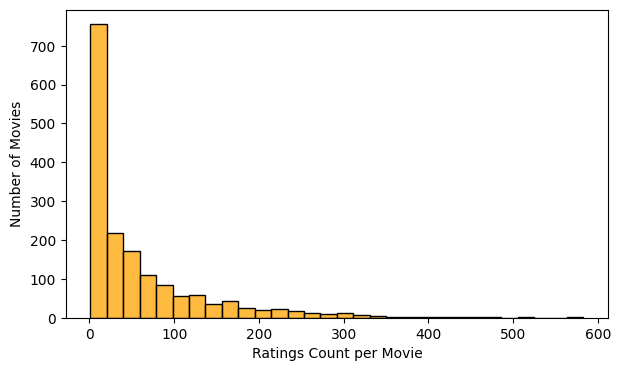

In [118]:
#Item Popularity, Ratings per Movie
item_popularity = ratings['item_id'].value_counts()
plt.figure(figsize=(7,4))
sns.histplot(item_popularity, bins=30, color='orange', kde=False)
plt.xlabel("Ratings Count per Movie")
plt.ylabel("Number of Movies")
plt.show()


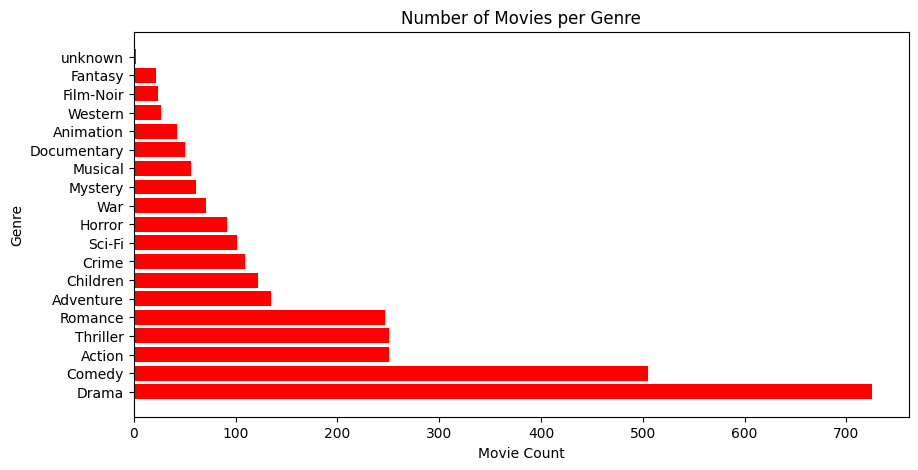

In [119]:
#Genre Analysis
genre_cols = items.columns[5:]
genre_counts = items[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.barh(genre_counts.index, genre_counts.values, color='red')
plt.title("Number of Movies per Genre")
plt.xlabel("Movie Count")
plt.ylabel("Genre")
plt.show()

In [120]:
#Missing Value Check
missing_summary = pd.DataFrame({"Ratings": ratings.isna().sum(),
                                "Users": users.isna().sum(),
                                "Items": items.isna().sum()})
display(missing_summary)

,Ratings,Users,Items
Action,NaN,NaN,0.0
Adventure,NaN,NaN,0.0
Animation,NaN,NaN,0.0
Children,NaN,NaN,0.0
Comedy,NaN,NaN,0.0
Crime,NaN,NaN,0.0
Documentary,NaN,NaN,0.0
Drama,NaN,NaN,0.0
Fantasy,NaN,NaN,0.0
Film-Noir,NaN,NaN,0.0



Matrix Density: 0.063 (6.30% filled)


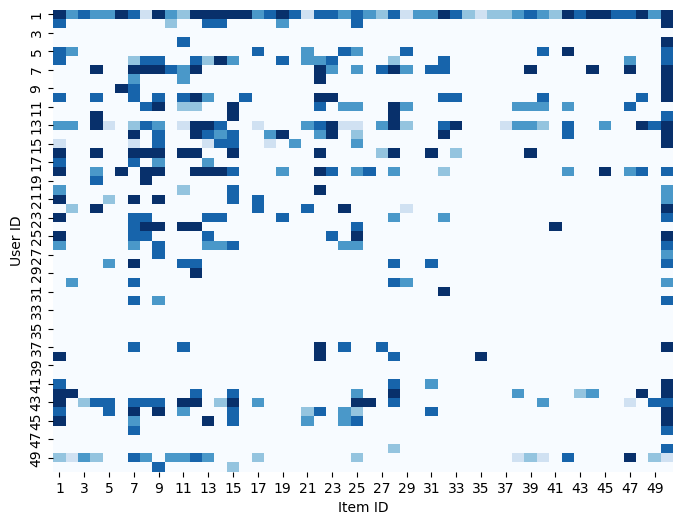

In [121]:
# Data Sparsity Visualization
num_users = ratings['user_id'].nunique()
num_items = ratings['item_id'].nunique()
density = len(ratings) / (num_users * num_items)
print(f"\nMatrix Density: {density:.3f} ({density*100:.2f}% filled)")

pivot_sample = ratings.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sample.iloc[:50, :50],cmap='Blues',cbar=False)
plt.xlabel("Item ID")
plt.ylabel("User ID")
plt.show()

## Matrix Factorization 
Processing 2D tensors, 1D is User, other is Item

In [122]:
# index mappings
user_ids = ratings['user_id'].unique()
item_ids = ratings['item_id'].unique()

user2idx = {u: i for i, u in enumerate(user_ids)}
item2idx = {m: i for i, m in enumerate(item_ids)}

# mapping application
ratings['user_idx'] = ratings['user_id'].map(user2idx)
ratings['item_idx'] = ratings['item_id'].map(item2idx)

# Train-test split
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=42)


In [123]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Parameters
n_factors = 32
epochs = 20
lr = 0.01
wd = 1e-5

num_users = len(user2idx)
num_items = len(item2idx)

# Embeddings and bias
user_emb = nn.Embedding(num_users, n_factors)
item_emb = nn.Embedding(num_items, n_factors)
user_bias = nn.Embedding(num_users, 1)
item_bias = nn.Embedding(num_items, 1)

# Initialize weights
nn.init.normal_(user_emb.weight, std=0.05)
nn.init.normal_(item_emb.weight, std=0.05)
nn.init.zeros_(user_bias.weight)
nn.init.zeros_(item_bias.weight)

# Optimizer and loss
optimizer = torch.optim.Adam(list(user_emb.parameters()) + list(item_emb.parameters()) + list(user_bias.parameters()) + list(item_bias.parameters()), 
                             lr=lr, weight_decay=wd)

criterion = nn.MSELoss()


In [124]:
# Training
# Convert data to tensors
users_train = torch.LongTensor(train_df['user_idx'].values)
items_train = torch.LongTensor(train_df['item_idx'].values)
ratings_train = torch.FloatTensor(train_df['rating'].values)

users_test = torch.LongTensor(test_df['user_idx'].values)
items_test = torch.LongTensor(test_df['item_idx'].values)
ratings_test = torch.FloatTensor(test_df['rating'].values)

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()

# Forward training
    u = user_emb(users_train)
    i = item_emb(items_train)
    preds = (u * i).sum(1) + user_bias(users_train).squeeze() + item_bias(items_train).squeeze()

# Loss + update
    loss = criterion(preds, ratings_train)
    loss.backward()
    optimizer.step()

 # Validation
    with torch.no_grad():
        u_val = user_emb(users_test)
        i_val = item_emb(items_test)
        val_preds = (u_val * i_val).sum(1) + user_bias(users_test).squeeze() + item_bias(items_test).squeeze()

        val_rmse = np.sqrt(mean_squared_error(ratings_test, val_preds))
        val_mae = mean_absolute_error(ratings_test, val_preds)

    print(f"Epoch {epoch}: Train Loss={loss.item():.3f} | "
          f"Val RMSE={val_rmse:.3f} | Val MAE={val_mae:.3f}")



Epoch 1: Train Loss=13.739 | Val RMSE=3.680 | Val MAE=3.504
Epoch 2: Train Loss=13.578 | Val RMSE=3.660 | Val MAE=3.483
Epoch 3: Train Loss=13.412 | Val RMSE=3.637 | Val MAE=3.459
Epoch 4: Train Loss=13.231 | Val RMSE=3.612 | Val MAE=3.433
Epoch 5: Train Loss=13.032 | Val RMSE=3.583 | Val MAE=3.403
Epoch 6: Train Loss=12.810 | Val RMSE=3.550 | Val MAE=3.368
Epoch 7: Train Loss=12.563 | Val RMSE=3.512 | Val MAE=3.329
Epoch 8: Train Loss=12.288 | Val RMSE=3.470 | Val MAE=3.284
Epoch 9: Train Loss=11.982 | Val RMSE=3.422 | Val MAE=3.234
Epoch 10: Train Loss=11.645 | Val RMSE=3.369 | Val MAE=3.178
Epoch 11: Train Loss=11.277 | Val RMSE=3.310 | Val MAE=3.116
Epoch 12: Train Loss=10.876 | Val RMSE=3.245 | Val MAE=3.047
Epoch 13: Train Loss=10.442 | Val RMSE=3.173 | Val MAE=2.971
Epoch 14: Train Loss=9.978 | Val RMSE=3.095 | Val MAE=2.888
Epoch 15: Train Loss=9.483 | Val RMSE=3.010 | Val MAE=2.797
Epoch 16: Train Loss=8.960 | Val RMSE=2.918 | Val MAE=2.698
Epoch 17: Train Loss=8.413 | Val RMS

In [125]:
#Evaluation
with torch.no_grad():
    u_eval = user_emb(users_test)
    i_eval = item_emb(items_test)
    preds = (u_eval * i_eval).sum(1) + user_bias(users_test).squeeze() + item_bias(items_test).squeeze()
    preds = preds.numpy()

mse = mean_squared_error(ratings_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ratings_test, preds)

print(f"\nEvaluation:\nRMSE = {rmse:.3f}\nMAE  = {mae:.3f}")



Evaluation:
RMSE = 2.480
MAE  = 2.248


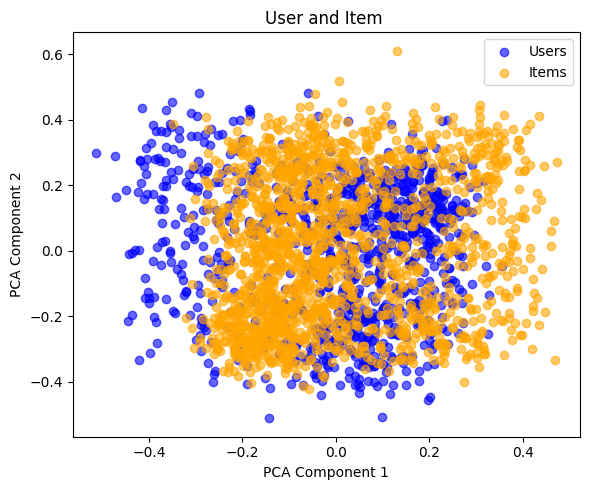

In [126]:
# Visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract trained embedding weights
user_weights = user_emb.weight.detach().numpy()
item_weights = item_emb.weight.detach().numpy()

# Reduce dimensions for visualization
pca = PCA(n_components=2)
user_pca = pca.fit_transform(user_weights)
item_pca = pca.fit_transform(item_weights)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(user_2d[:, 0], user_pca[:, 1], color='blue', alpha=0.6, label='Users')
plt.scatter(item_2d[:, 0], item_pca[:, 1], color='orange', alpha=0.6, label='Items')
plt.legend()
plt.title("User and Item ")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


## 3D tensor
Previously have 2 Dimensions, User and Item, now adding 3rd Dimension, Gener as "Context"

In [127]:
# Extracting genre columns. from col5 to end
genre_cols = items.columns[5:]
num_genres = len(genre_cols)
print(f"Number of Genres: {num_genres}")

item_genre_map = {}
for i, row in items.iterrows():
    genres = [g for g in genre_cols if row[g] == 1]
    item_genre_map[row['item_id']] = [genre_cols.get_loc(g) for g in genres]

tensor_data = []
for i, row in ratings.iterrows():
    genres = item_genre_map.get(row['item_id'], [])
    for g in genres:
        tensor_data.append((row['user_idx'], row['item_idx'], g, row['rating']))

tensor_df = pd.DataFrame(tensor_data, columns=['user', 'item', 'genre', 'rating'])
print(tensor_df.head())


Number of Genres: 19
   user  item  genre  rating
0     0     0      5       3
1     1     1      6       3
2     1     1     10       3
3     1     1     13       3
4     1     1     16       3


## Tensor Parameter Initialization

In [128]:

# Dimensions
rank = 16
num_users = len(user2idx)
num_items = len(item2idx)
num_genres = len(genre_cols)

# Embedding layers
user_factors = nn.Embedding(num_users, rank)
item_factors = nn.Embedding(num_items, rank)
genre_factors = nn.Embedding(num_genres, rank)

# Xavier initialization
nn.init.xavier_uniform_(user_factors.weight)
nn.init.xavier_uniform_(item_factors.weight)
nn.init.xavier_uniform_(genre_factors.weight)

# Optimizer and loss Calc
optimizer = torch.optim.Adam(
    list(user_factors.parameters()) + list(item_factors.parameters()) + list(genre_factors.parameters()),lr=0.01, weight_decay=1e-5)
criterion = nn.MSELoss()


## Traing 3D tensors Model

In [129]:
train_tensor, test_tensor = train_test_split(tensor_df, test_size=0.2, random_state=42)

u_train = torch.LongTensor(train_tensor['user'].values)
i_train = torch.LongTensor(train_tensor['item'].values)
g_train = torch.LongTensor(train_tensor['genre'].values)
r_train = torch.FloatTensor(train_tensor['rating'].values)

u_test = torch.LongTensor(test_tensor['user'].values)
i_test = torch.LongTensor(test_tensor['item'].values)
g_test = torch.LongTensor(test_tensor['genre'].values)
r_test = torch.FloatTensor(test_tensor['rating'].values)

epochs = 15
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()

    u_f = user_factors(u_train)
    i_f = item_factors(i_train)
    g_f = genre_factors(g_train)
    preds = torch.sum(u_f * i_f * g_f, dim=1)

    loss = criterion(preds, r_train)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        u_val = user_factors(u_test)
        i_val = item_factors(i_test)
        g_val = genre_factors(g_test)
        val_preds = torch.sum(u_val * i_val * g_val, dim=1)
        val_rmse = np.sqrt(mean_squared_error(r_test, val_preds))
        val_mae = mean_absolute_error(r_test, val_preds)

    print(f"Epoch {epoch}: Train Loss={loss.item():.3f} | "f"Val RMSE={val_rmse:.3f} | Val MAE={val_mae:.3f}")


Epoch 1: Train Loss=13.863 | Val RMSE=3.724 | Val MAE=3.553
Epoch 2: Train Loss=13.862 | Val RMSE=3.724 | Val MAE=3.553
Epoch 3: Train Loss=13.860 | Val RMSE=3.724 | Val MAE=3.553
Epoch 4: Train Loss=13.858 | Val RMSE=3.723 | Val MAE=3.553
Epoch 5: Train Loss=13.854 | Val RMSE=3.723 | Val MAE=3.552
Epoch 6: Train Loss=13.849 | Val RMSE=3.722 | Val MAE=3.551
Epoch 7: Train Loss=13.841 | Val RMSE=3.721 | Val MAE=3.550
Epoch 8: Train Loss=13.831 | Val RMSE=3.719 | Val MAE=3.549
Epoch 9: Train Loss=13.818 | Val RMSE=3.717 | Val MAE=3.547
Epoch 10: Train Loss=13.801 | Val RMSE=3.715 | Val MAE=3.544
Epoch 11: Train Loss=13.781 | Val RMSE=3.712 | Val MAE=3.541
Epoch 12: Train Loss=13.756 | Val RMSE=3.708 | Val MAE=3.537
Epoch 13: Train Loss=13.727 | Val RMSE=3.704 | Val MAE=3.532
Epoch 14: Train Loss=13.692 | Val RMSE=3.699 | Val MAE=3.527
Epoch 15: Train Loss=13.651 | Val RMSE=3.692 | Val MAE=3.521


In [130]:
#Evaluation
with torch.no_grad():
    u_eval = user_factors(u_test)
    i_eval = item_factors(i_test)
    g_eval = genre_factors(g_test)
    preds = torch.sum(u_eval * i_eval * g_eval, dim=1).numpy()

rmse = np.sqrt(mean_squared_error(r_test, preds))
mae = mean_absolute_error(r_test, preds)

print(f"\nFinal Evaluation:\nRMSE = {rmse:.3f}\nMAE  = {mae:.3f}")



Final Evaluation:
RMSE = 3.692
MAE  = 3.521


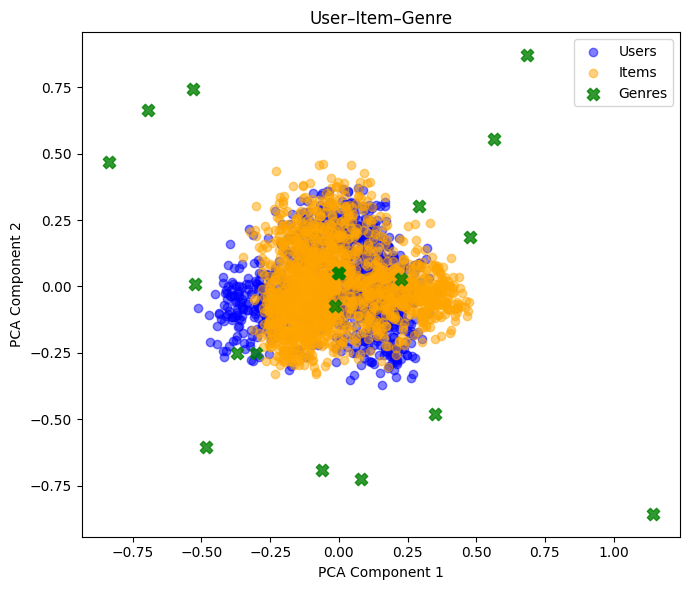

In [131]:
# Visualization

user_emb = user_factors.weight.detach().numpy()
item_emb = item_factors.weight.detach().numpy()
genre_emb = genre_factors.weight.detach().numpy()

pca = PCA(n_components=2)
user_pca = pca.fit_transform(user_emb)
item_pca = pca.fit_transform(item_emb)
genre_pca = pca.fit_transform(genre_emb)

plt.figure(figsize=(7, 6))
plt.scatter(user_2d[:, 0], user_pca[:, 1], color='blue', alpha=0.5, label='Users')
plt.scatter(item_2d[:, 0], item_pca[:, 1], color='orange', alpha=0.5, label='Items')
plt.scatter(genre_2d[:, 0], genre_pca[:, 1], color='green', alpha=0.8, label='Genres', marker='X', s=80)
plt.legend()
plt.title("User–Item–Genre")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


Research Paper = Tensor Factorization for Recommender Systems (Kolda & Bader, 2009)

Coding Sources:

https://pytorch.org/tutorials/intermediate/matrix_factorization_tutorial.html

https://pytorch.org/tutorials/intermediate/matrix_factorization_tutorial.html

https://tensorly.org/stable/

